In [28]:
import numpy as np
import pandas as pd

In [29]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')


In [30]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4988,ham,So your telling me I coulda been your real Val...,NaN,NaN,NaN
1354,ham,Baaaaabe! I misss youuuuu ! Where are you ? I ...,NaN,NaN,NaN
5283,ham,"Yeah, probably here for a while",NaN,NaN,NaN
3951,ham,Me hungry buy some food good lei... But mum n ...,NaN,NaN,NaN
550,ham,Imagine you finally get to sink into that bath...,NaN,NaN,NaN


In [31]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [32]:
df.shape

(5572, 5)

In [33]:
# 1.data cleaning
# 2.EDA
# 3.text preprocessing
# 4.model building
# 5.Evaluation
# 6.Improvement
# 7.Website
# 8.Deploy

1. Data Cleaning

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [35]:
# droping last 3 col
df.drop(columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [36]:
df.sample(5)

,v1,v2
1782,ham,My uncles in Atlanta. Wish you guys a great se...
3971,ham,WOT U UP 2 J?
1198,ham,Al he does is moan at me if n e thin goes wron...
2957,spam,U have a secret admirer. REVEAL who thinks U R...
1370,ham,Hope you are feeling great. Pls fill me in. Ab...


In [37]:
# renaming the col
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [38]:
df.rename(columns={'targer': 'target'}, inplace=True)

In [39]:
df.sample(5)

,target,text
2430,ham,How was txting and driving
1644,ham,India have to take lead:)
703,ham,"Thats a bit weird, even ?- where is the do sup..."
178,ham,Text her. If she doesnt reply let me know so i...
119,spam,PRIVATE! Your 2004 Account Statement for 07742...


In [40]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [41]:
df['target'] = encoder.fit_transform(df['target'])

In [42]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [43]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [44]:
df.duplicated().sum()

403

In [45]:
df = df.drop_duplicates(keep = 'first')

In [46]:
df.duplicated().sum()

0

In [47]:
df.shape

(5169, 2)

EDA

In [48]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [49]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

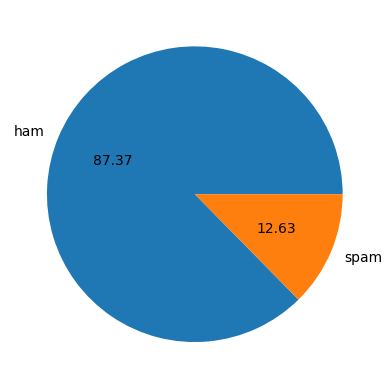

In [23]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [54]:
#data is imbalance

In [56]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Swayam B
[nltk_data]     Solanki\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [50]:
df['num_characters'] = df['text'].apply(len)

In [51]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [62]:
from nltk.tokenize import TreebankWordTokenizer
tokenizer = TreebankWordTokenizer()
df['tokens'] = df['text'].apply(tokenizer.tokenize)


In [66]:
df['num_words'] = df['tokens'].apply(len)

In [67]:
df.head()

,target,text,num_characters,tokens,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,"[Go, until, jurong, point, ,, crazy.., Availab...",23
1,0,Ok lar... Joking wif u oni...,29,"[Ok, lar, ..., Joking, wif, u, oni, ...]",8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[Free, entry, in, 2, a, wkly, comp, to, win, F...",36
3,0,U dun say so early hor... U c already then say...,49,"[U, dun, say, so, early, hor, ..., U, c, alrea...",13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,"[Nah, I, do, n't, think, he, goes, to, usf, ,,...",15


In [88]:
import re

def simple_sent_tokenize(text):
    # Split text at punctuation followed by a space and a capital letter
    return re.split(r'(?<=[.!?])\s+(?=[A-Z])', text.strip())

df['num_sentences'] = df['text'].apply(simple_sent_tokenize)


In [95]:
df['num_sentences'] = df['text'].apply(lambda x: len(simple_sent_tokenize(x)))


In [98]:
# droping last 3 col
# df.drop(columns = ['tokens','sentences'],inplace=True)

In [99]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,23,3
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,36,2
3,0,U dun say so early hor... U c already then say...,49,13,2
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [102]:
df.describe()

,target,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,17.695299,1.933256
std,0.332253,58.236293,12.672457,1.290293
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,14.000000,2.000000
75%,0.000000,117.000000,25.000000,2.000000
max,1.000000,910.000000,214.000000,26.000000


In [101]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,17.695299,1.933256
std,58.236293,12.672457,1.290293
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,14.000000,2.000000
75%,117.000000,25.000000,2.000000
max,910.000000,214.000000,26.000000


In [103]:
# Ham
df[df['target']==0][['num_characters',	'num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,16.452613,1.835695
std,56.358207,12.858450,1.256662
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,21.000000,2.000000
max,910.000000,214.000000,26.000000


In [105]:
# spam
df[df['target']==1][['num_characters',	'num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,26.289433,2.607963
std,30.137753,6.579189,1.318601
min,13.000000,2.000000,1.000000
25%,132.000000,24.000000,2.000000
50%,149.000000,28.000000,2.000000
75%,157.000000,30.000000,3.000000
max,224.000000,41.000000,7.000000


In [106]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

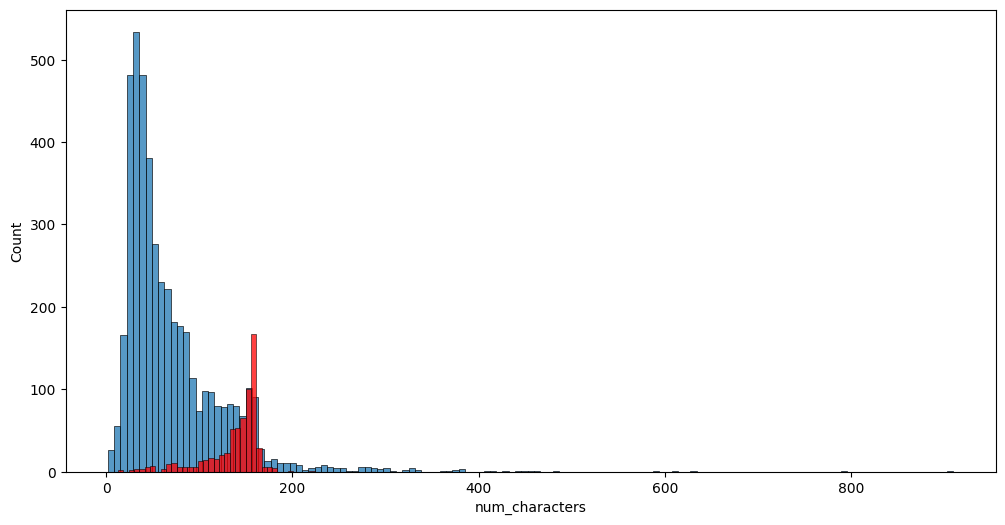

In [121]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']== 0 ]['num_characters'])
sns.histplot(df[df['target']== 1 ]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

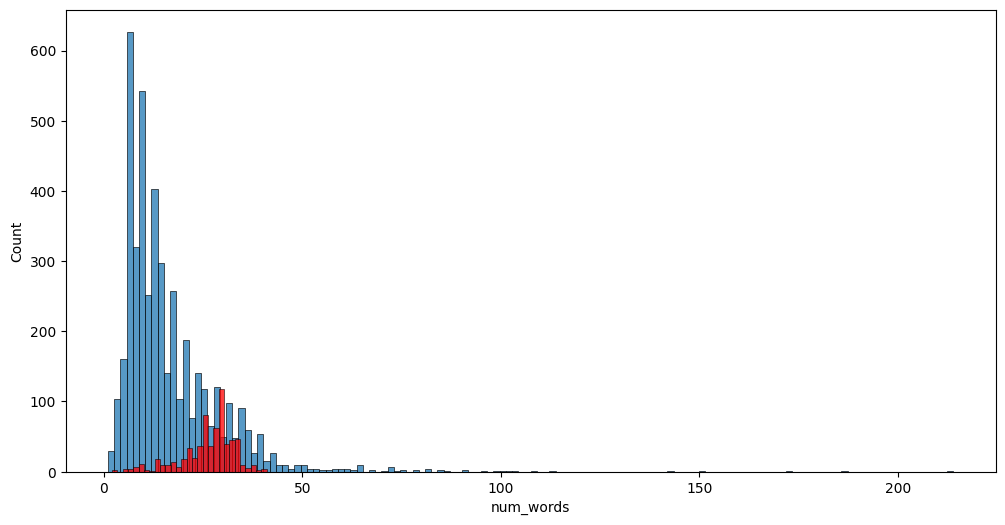

In [122]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']== 0 ]['num_words'])
sns.histplot(df[df['target']== 1 ]['num_words'],color='red')

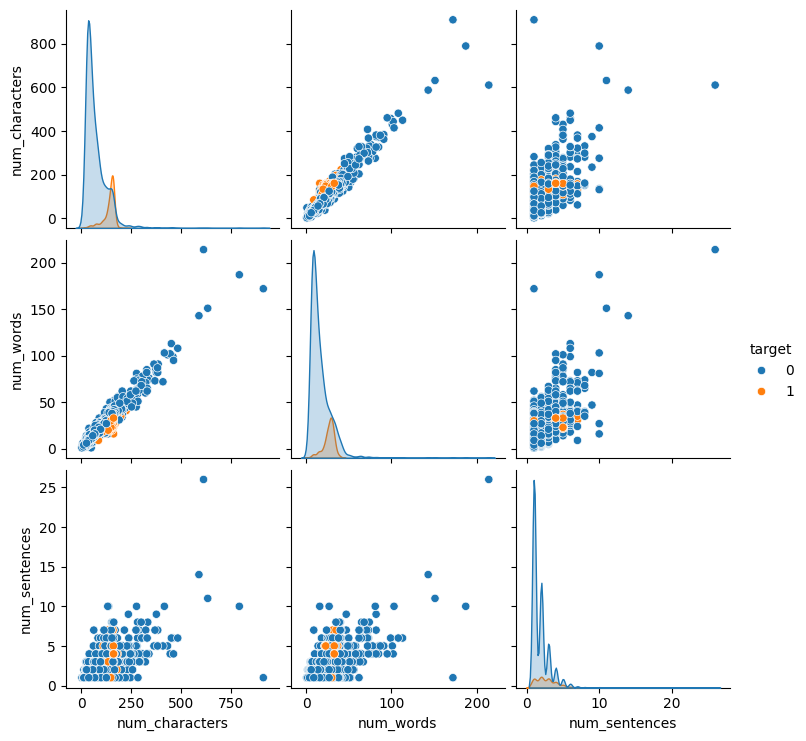

In [123]:
sns.pairplot(df,hue='target')

<Axes: >

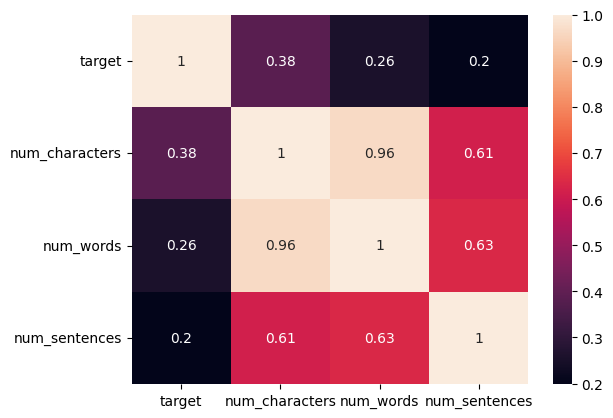

In [127]:
sns.heatmap(df.select_dtypes(include='number').corr(),annot=True)


3.Data Preprocessing

Lower case

Tokenization

Removing special characters

Removing stop words and punctuation

Stemming

In [154]:
!pip install nltk

In [155]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to C:\Users\Swayam B
[nltk_data]     Solanki\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [156]:
import nltk
from nltk.tokenize import word_tokenize

def transform_text(text):
    text = text.lower()
    tokens = word_tokenize(text)  # ✅ correct usage

    y = []  # ✅ define y before using it
    for i in tokens:
        if i.isalnum():  # ✅ keeps only alphanumeric tokens
            y.append(i)

    return y


In [157]:
transform_text('IMDNSJNSO SDNSDNDS GOOD 20 %^$ ')

LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - 'C:\\Users\\Swayam B Solanki/nltk_data'
    - 'C:\\Users\\Swayam B Solanki\\AppData\\Local\\Programs\\Python\\Python310\\nltk_data'
    - 'C:\\Users\\Swayam B Solanki\\AppData\\Local\\Programs\\Python\\Python310\\share\\nltk_data'
    - 'C:\\Users\\Swayam B Solanki\\AppData\\Local\\Programs\\Python\\Python310\\lib\\nltk_data'
    - 'C:\\Users\\Swayam B Solanki\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************
